In [1]:
import tensorflow as tf
import pandas as pd

#**Importing Datasets**

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#**plotting image**

In [5]:
import matplotlib.pyplot as plt

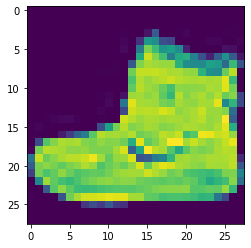

In [6]:
plt.imshow(x_train[0])
plt.show()

# **Processing the Image Data**

In [7]:
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
import numpy as np

np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# **Creating the  Model**

In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (28,28)),
                                    tf.keras.layers.Dense(128, activation= "relu"),
                                    tf.keras.layers.Dense(10, activation= "softmax")
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"]
              )



In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(x_train, y_train,
          epochs = 20,
          validation_data = (x_test, y_test)
          )

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4954 - accuracy: 0.8249 - val_loss: 0.4178 - val_accuracy: 0.8509
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3744 - accuracy: 0.8642 - val_loss: 0.4016 - val_accuracy: 0.8553
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3374 - accuracy: 0.8767 - val_loss: 0.3888 - val_accuracy: 0.8568
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3137 - accuracy: 0.8844 - val_loss: 0.3610 - val_accuracy: 0.8670
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2939 - accuracy: 0.8908 - val_loss: 0.3439 - val_accuracy: 0.8762
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2821 - accuracy: 0.8956 - val_loss: 0.3482 - val_accuracy: 0.8765
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2682 - accuracy: 0.8987 - val_loss: 0.3390 - val_accuracy: 0.8792
Epo

In [12]:
model_evaluation = model.evaluate(x_test, y_test)

print(f"Model Accuracy : {model_evaluation[1] * 100 : .2f} %")

313/313 [==============================] - 0s 1ms/step - loss: 0.3545 - accuracy: 0.8882
Model Accuracy :  88.82 %


In [13]:
model.save("fashion_mnist.h5")

#**Converting to Tensorflow Lite**

In [14]:
lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)

lite_model = lite_converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp23fb47b_/assets


In [15]:
open("model.tflite", "wb").write(lite_model)

408740